In [8]:
%matplotlib inline

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
import osmnx as ox

sns.set_style('whitegrid')
from node2vec.edges import HadamardEmbedder
import gensim.downloader

In [14]:
G = nx.read_edgelist("madrid_length.edgelist", nodetype=int, data=(("length", float),))
list(G.edges(data=True))

[(171946, 26513145, {'length': 41.093}),
 (171946, 7549719097, {'length': 5.09}),
 (171946, 7549719114, {'length': 14.136}),
 (26513145, 26513105, {'length': 113.959}),
 (26513145, 5385241349, {'length': 54.042}),
 (171948, 1209331142, {'length': 14.084}),
 (171948, 1209332028, {'length': 50.068}),
 (1209331142, 3235382375, {'length': 2.574}),
 (171951, 1209331009, {'length': 18.733}),
 (171951, 991794380, {'length': 54.211}),
 (171951, 26486638, {'length': 125.173}),
 (171951, 26486653, {'length': 72.369}),
 (1209331009, 3235394278, {'length': 7.579}),
 (1209331009, 3678016654, {'length': 89.213}),
 (1209331009, 3964130849, {'length': 69.653}),
 (991794380, 3964130850, {'length': 0.736}),
 (171952, 26486617, {'length': 26.251}),
 (171952, 3964130834, {'length': 21.091}),
 (171952, 7537704694, {'length': 10.486}),
 (26486617, 26486588, {'length': 121.211}),
 (26486617, 26486618, {'length': 85.817}),
 (26486617, 2681222069, {'length': 13.964}),
 (171953, 2681222064, {'length': 18.835}),

In [15]:
node2vec = Node2Vec(G, dimensions=256, walk_length=100, num_walks=50, workers=4, weight_key='length')

error: 'i' format requires -2147483648 <= number <= 2147483647

In [ ]:
model = node2vec.fit(window=10, min_count=1)

In [9]:
model.wv.save_word2vec_format('emb_256')

In [20]:
G.edges

EdgeView([(171946, 26513145), (171946, 7549719097), (171946, 7549719114), (26513145, 26513105), (26513145, 5385241349), (171948, 1209331142), (171948, 1209332028), (1209331142, 3235382375), (171951, 1209331009), (171951, 991794380), (171951, 26486638), (171951, 26486653), (1209331009, 3235394278), (1209331009, 3678016654), (1209331009, 3964130849), (991794380, 3964130850), (171952, 26486617), (171952, 3964130834), (171952, 7537704694), (26486617, 26486588), (26486617, 26486618), (26486617, 2681222069), (171953, 2681222064), (171953, 3166517084), (171953, 5075560300), (171953, 6023449657), (2681222064, 2681222066), (2681222064, 8441342340), (3166517084, 8441342333), (171954, 8147262594), (171954, 1727199789), (171954, 1727199805), (8147262594, 1727199772), (1727199789, 1727199786), (171959, 26501641), (171959, 2522904758), (26501641, 4280688734), (26501641, 2522904777), (26501641, 4280688757), (20952874, 1168641427), (20952874, 316051889), (1168641427, 20952897), (20952875, 20952899), (

In [16]:
start_node = {}
path = "emb"
x=[]
with open(path, 'r', encoding='utf8') as f:  ## 這個文檔的格式是一行一個字並配上他的向量，以空白鍵分隔
    for line in f:  
        tokens = line.split()
        token = tokens[0]  ## 第一個token就是詞彙
        vec = tokens[1:]  ## 後面的token向量
        x.append(vec)  ## 把整個model做成一個字典，以利查找字對應的向量
del x[0]
start_node = np.array(x, dtype=np.float32)
start_node

array([[-1.2842236e+01,  4.3928156e+00, -2.0913119e+00, ...,
         6.9004946e+00, -3.9186261e+00,  8.5888653e+00],
       [-1.0612859e+00, -5.7955581e-01, -1.0521069e+01, ...,
         1.0272665e+01,  5.7694507e+00,  4.3723841e+00],
       [-1.1107963e+01, -1.7748369e-01,  2.9160419e+00, ...,
         6.0289965e+00,  6.9413815e+00, -6.2928028e-02],
       ...,
       [ 1.5574330e-01, -9.9239573e-02, -6.8564706e-02, ...,
        -1.3104130e-01,  2.1637376e-02,  3.2416946e-01],
       [-2.2971512e-01,  3.7245035e-01,  1.1594241e-01, ...,
         1.6973574e-01,  1.6163221e-02,  4.2369789e-01],
       [-4.8850216e-02,  7.8554474e-02, -5.4066941e-02, ...,
         2.0493528e-02,  9.8569039e-03,  1.3229062e-01]], dtype=float32)

In [21]:
i=1
for u,v in G.edges:
    print(i)
    i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682


4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181


7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681


10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
1064

13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
1364

16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16630
16631
16632
16633
16634
16635
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
1664

19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
1999

22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
22614
22615
22616
22617
22618
22619
22620
22621
22622
22623
22624
22625
22626
22627
22628
22629
22630
22631
22632
22633
22634
22635
22636
22637
22638
22639
22640
22641
22642
22643
22644
2264

25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
2564

28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
28548
28549
28550
28551
28552
28553
28554
28555
28556
28557
28558
28559
28560
28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
28574
28575
28576
28577
28578
28579
28580
28581
28582
28583
28584
28585
28586
28587
28588
28589
28590
28591
28592
28593
28594
28595
28596
28597
28598
28599
28600
28601
28602
28603
28604
28605
28606
28607
28608
28609
2861

30478
30479
30480
30481
30482
30483
30484
30485
30486
30487
30488
30489
30490
30491
30492
30493
30494
30495
30496
30497
30498
30499
30500
30501
30502
30503
30504
30505
30506
30507
30508
30509
30510
30511
30512
30513
30514
30515
30516
30517
30518
30519
30520
30521
30522
30523
30524
30525
30526
30527
30528
30529
30530
30531
30532
30533
30534
30535
30536
30537
30538
30539
30540
30541
30542
30543
30544
30545
30546
30547
30548
30549
30550
30551
30552
30553
30554
30555
30556
30557
30558
30559
30560
30561
30562
30563
30564
30565
30566
30567
30568
30569
30570
30571
30572
30573
30574
30575
30576
30577
30578
30579
30580
30581
30582
30583
30584
30585
30586
30587
30588
30589
30590
30591
30592
30593
30594
30595
30596
30597
30598
30599
30600
30601
30602
30603
30604
30605
30606
30607
30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
3064

33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
34033
34034
34035
34036
34037
34038
34039
34040
34041
34042
34043
34044
34045
34046
34047
34048
34049
34050
34051
34052
34053
34054
34055
34056
34057
34058
34059
34060
34061
34062
34063
34064
34065
34066
34067
34068
34069
34070
34071
34072
34073
34074
34075
34076
34077
34078
34079
34080
34081
34082
34083
34084
34085
34086
34087
34088
34089
34090
34091
34092
34093
34094
34095
34096
34097
34098
34099
34100
34101
34102
34103
34104
34105
34106
34107
34108
34109
34110
34111
34112
34113
34114
34115
3411

35977
35978
35979
35980
35981
35982
35983
35984
35985
35986
35987
35988
35989
35990
35991
35992
35993
35994
35995
35996
35997
35998
35999
36000
36001
36002
36003
36004
36005
36006
36007
36008
36009
36010
36011
36012
36013
36014
36015
36016
36017
36018
36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
3614

39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
39640
39641
3964

42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
42512
42513
42514
42515
42516
42517
42518
42519
42520
42521
42522
42523
42524
42525
42526
42527
42528
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
42567
42568
42569
42570
42571
42572
42573
42574
42575
42576
42577
42578
42579
42580
42581
42582
42583
42584
42585
42586
42587
42588
42589
42590
42591
42592
42593
42594
42595
42596
42597
42598
42599
42600
42601
42602
42603
42604
42605
42606
42607
42608
42609
42610
42611
42612
42613
42614
42615
42616
42617
42618
42619
42620
42621
42622
42623
42624
42625
42626
42627
42628
42629
42630
42631
42632
42633
42634
42635
42636
42637
42638
42639
42640
42641
4264

45975
45976
45977
45978
45979
45980
45981
45982
45983
45984
45985
45986
45987
45988
45989
45990
45991
45992
45993
45994
45995
45996
45997
45998
45999
46000
46001
46002
46003
46004
46005
46006
46007
46008
46009
46010
46011
46012
46013
46014
46015
46016
46017
46018
46019
46020
46021
46022
46023
46024
46025
46026
46027
46028
46029
46030
46031
46032
46033
46034
46035
46036
46037
46038
46039
46040
46041
46042
46043
46044
46045
46046
46047
46048
46049
46050
46051
46052
46053
46054
46055
46056
46057
46058
46059
46060
46061
46062
46063
46064
46065
46066
46067
46068
46069
46070
46071
46072
46073
46074
46075
46076
46077
46078
46079
46080
46081
46082
46083
46084
46085
46086
46087
46088
46089
46090
46091
46092
46093
46094
46095
46096
46097
46098
46099
46100
46101
46102
46103
46104
46105
46106
46107
46108
46109
46110
46111
46112
46113
46114
46115
46116
46117
46118
46119
46120
46121
46122
46123
46124
46125
46126
46127
46128
46129
46130
46131
46132
46133
46134
46135
46136
46137
46138
46139
46140
4614

48975
48976
48977
48978
48979
48980
48981
48982
48983
48984
48985
48986
48987
48988
48989
48990
48991
48992
48993
48994
48995
48996
48997
48998
48999
49000
49001
49002
49003
49004
49005
49006
49007
49008
49009
49010
49011
49012
49013
49014
49015
49016
49017
49018
49019
49020
49021
49022
49023
49024
49025
49026
49027
49028
49029
49030
49031
49032
49033
49034
49035
49036
49037
49038
49039
49040
49041
49042
49043
49044
49045
49046
49047
49048
49049
49050
49051
49052
49053
49054
49055
49056
49057
49058
49059
49060
49061
49062
49063
49064
49065
49066
49067
49068
49069
49070
49071
49072
49073
49074
49075
49076
49077
49078
49079
49080
49081
49082
49083
49084
49085
49086
49087
49088
49089
49090
49091
49092
49093
49094
49095
49096
49097
49098
49099
49100
49101
49102
49103
49104
49105
49106
49107
49108
49109
49110
49111
49112
49113
49114
49115
49116
49117
49118
49119
49120
49121
49122
49123
49124
49125
49126
49127
49128
49129
49130
49131
49132
49133
49134
49135
49136
49137
49138
49139
49140
4914

51474
51475
51476
51477
51478
51479
51480
51481
51482
51483
51484
51485
51486
51487
51488
51489
51490
51491
51492
51493
51494
51495
51496
51497
51498
51499
51500
51501
51502
51503
51504
51505
51506
51507
51508
51509
51510
51511
51512
51513
51514
51515
51516
51517
51518
51519
51520
51521
51522
51523
51524
51525
51526
51527
51528
51529
51530
51531
51532
51533
51534
51535
51536
51537
51538
51539
51540
51541
51542
51543
51544
51545
51546
51547
51548
51549
51550
51551
51552
51553
51554
51555
51556
51557
51558
51559
51560
51561
51562
51563
51564
51565
51566
51567
51568
51569
51570
51571
51572
51573
51574
51575
51576
51577
51578
51579
51580
51581
51582
51583
51584
51585
51586
51587
51588
51589
51590
51591
51592
51593
51594
51595
51596
51597
51598
51599
51600
51601
51602
51603
51604
51605
51606
51607
51608
51609
51610
51611
51612
51613
51614
51615
51616
51617
51618
51619
51620
51621
51622
51623
51624
51625
51626
51627
51628
51629
51630
51631
51632
51633
51634
51635
51636
51637
51638
51639
5164

54474
54475
54476
54477
54478
54479
54480
54481
54482
54483
54484
54485
54486
54487
54488
54489
54490
54491
54492
54493
54494
54495
54496
54497
54498
54499
54500
54501
54502
54503
54504
54505
54506
54507
54508
54509
54510
54511
54512
54513
54514
54515
54516
54517
54518
54519
54520
54521
54522
54523
54524
54525
54526
54527
54528
54529
54530
54531
54532
54533
54534
54535
54536
54537
54538
54539
54540
54541
54542
54543
54544
54545
54546
54547
54548
54549
54550
54551
54552
54553
54554
54555
54556
54557
54558
54559
54560
54561
54562
54563
54564
54565
54566
54567
54568
54569
54570
54571
54572
54573
54574
54575
54576
54577
54578
54579
54580
54581
54582
54583
54584
54585
54586
54587
54588
54589
54590
54591
54592
54593
54594
54595
54596
54597
54598
54599
54600
54601
54602
54603
54604
54605
54606
54607
54608
54609
54610
54611
54612
54613
54614
54615
54616
54617
54618
54619
54620
54621
54622
54623
54624
54625
54626
54627
54628
54629
54630
54631
54632
54633
54634
54635
54636
54637
54638
54639
5464

57473
57474
57475
57476
57477
57478
57479
57480
57481
57482
57483
57484
57485
57486
57487
57488
57489
57490
57491
57492
57493
57494
57495
57496
57497
57498
57499
57500
57501
57502
57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
57514
57515
57516
57517
57518
57519
57520
57521
57522
57523
57524
57525
57526
57527
57528
57529
57530
57531
57532
57533
57534
57535
57536
57537
57538
57539
57540
57541
57542
57543
57544
57545
57546
57547
57548
57549
57550
57551
57552
57553
57554
57555
57556
57557
57558
57559
57560
57561
57562
57563
57564
57565
57566
57567
57568
57569
57570
57571
57572
57573
57574
57575
57576
57577
57578
57579
57580
57581
57582
57583
57584
57585
57586
57587
57588
57589
57590
57591
57592
57593
57594
57595
57596
57597
57598
57599
57600
57601
57602
57603
57604
57605
57606
57607
57608
57609
57610
57611
57612
57613
57614
57615
57616
57617
57618
57619
57620
57621
57622
57623
57624
57625
57626
57627
57628
57629
57630
57631
57632
57633
57634
57635
57636
57637
57638
5763

60973
60974
60975
60976
60977
60978
60979
60980
60981
60982
60983
60984
60985
60986
60987
60988
60989
60990
60991
60992
60993
60994
60995
60996
60997
60998
60999
61000
61001
61002
61003
61004
61005
61006
61007
61008
61009
61010
61011
61012
61013
61014
61015
61016
61017
61018
61019
61020
61021
61022
61023
61024
61025
61026
61027
61028
61029
61030
61031
61032
61033
61034
61035
61036
61037
61038
61039
61040
61041
61042
61043
61044
61045
61046
61047
61048
61049
61050
61051
61052
61053
61054
61055
61056
61057
61058
61059
61060
61061
61062
61063
61064
61065
61066
61067
61068
61069
61070
61071
61072
61073
61074
61075
61076
61077
61078
61079
61080
61081
61082
61083
61084
61085
61086
61087
61088
61089
61090
61091
61092
61093
61094
61095
61096
61097
61098
61099
61100
61101
61102
61103
61104
61105
61106
61107
61108
61109
61110
61111
61112
61113
61114
61115
61116
61117
61118
61119
61120
61121
61122
61123
61124
61125
61126
61127
61128
61129
61130
61131
61132
61133
61134
61135
61136
61137
61138
6113

63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
63982
63983
63984
63985
63986
63987
63988
63989
63990
63991
63992
63993
63994
63995
63996
63997
63998
63999
64000
64001
64002
64003
64004
64005
64006
64007
64008
64009
64010
64011
64012
64013
64014
64015
64016
64017
64018
64019
64020
64021
64022
64023
64024
64025
64026
64027
64028
64029
64030
64031
64032
64033
64034
64035
64036
64037
64038
64039
64040
64041
64042
64043
64044
64045
64046
64047
64048
64049
64050
64051
64052
64053
64054
64055
64056
64057
64058
64059
64060
64061
64062
64063
64064
64065
64066
64067
64068
64069
64070
64071
64072
64073
64074
64075
64076
64077
64078
64079
64080
64081
64082
64083
64084
64085
64086
64087
64088
64089
64090
64091
64092
64093
64094
64095
64096
64097
64098
64099
64100
64101
64102
64103
64104
64105
64106
64107
64108
64109
64110
64111
64112
64113
64114
64115
64116
64117
64118
64119
64120
64121
64122
64123
64124
64125
64126
64127
64128
64129
64130
64131
64132
64133
64134
64135
64136
64137
6413

66972
66973
66974
66975
66976
66977
66978
66979
66980
66981
66982
66983
66984
66985
66986
66987
66988
66989
66990
66991
66992
66993
66994
66995
66996
66997
66998
66999
67000
67001
67002
67003
67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67039
67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67050
67051
67052
67053
67054
67055
67056
67057
67058
67059
67060
67061
67062
67063
67064
67065
67066
67067
67068
67069
67070
67071
67072
67073
67074
67075
67076
67077
67078
67079
67080
67081
67082
67083
67084
67085
67086
67087
67088
67089
67090
67091
67092
67093
67094
67095
67096
67097
67098
67099
67100
67101
67102
67103
67104
67105
67106
67107
67108
67109
67110
67111
67112
67113
67114
67115
67116
67117
67118
67119
67120
67121
67122
67123
67124
67125
67126
67127
67128
67129
67130
67131
67132
67133
67134
67135
67136
67137
6713

70471
70472
70473
70474
70475
70476
70477
70478
70479
70480
70481
70482
70483
70484
70485
70486
70487
70488
70489
70490
70491
70492
70493
70494
70495
70496
70497
70498
70499
70500
70501
70502
70503
70504
70505
70506
70507
70508
70509
70510
70511
70512
70513
70514
70515
70516
70517
70518
70519
70520
70521
70522
70523
70524
70525
70526
70527
70528
70529
70530
70531
70532
70533
70534
70535
70536
70537
70538
70539
70540
70541
70542
70543
70544
70545
70546
70547
70548
70549
70550
70551
70552
70553
70554
70555
70556
70557
70558
70559
70560
70561
70562
70563
70564
70565
70566
70567
70568
70569
70570
70571
70572
70573
70574
70575
70576
70577
70578
70579
70580
70581
70582
70583
70584
70585
70586
70587
70588
70589
70590
70591
70592
70593
70594
70595
70596
70597
70598
70599
70600
70601
70602
70603
70604
70605
70606
70607
70608
70609
70610
70611
70612
70613
70614
70615
70616
70617
70618
70619
70620
70621
70622
70623
70624
70625
70626
70627
70628
70629
70630
70631
70632
70633
70634
70635
70636
7063

73471
73472
73473
73474
73475
73476
73477
73478
73479
73480
73481
73482
73483
73484
73485
73486
73487
73488
73489
73490
73491
73492
73493
73494
73495
73496
73497
73498
73499
73500
73501
73502
73503
73504
73505
73506
73507
73508
73509
73510
73511
73512
73513
73514
73515
73516
73517
73518
73519
73520
73521
73522
73523
73524
73525
73526
73527
73528
73529
73530
73531
73532
73533
73534
73535
73536
73537
73538
73539
73540
73541
73542
73543
73544
73545
73546
73547
73548
73549
73550
73551
73552
73553
73554
73555
73556
73557
73558
73559
73560
73561
73562
73563
73564
73565
73566
73567
73568
73569
73570
73571
73572
73573
73574
73575
73576
73577
73578
73579
73580
73581
73582
73583
73584
73585
73586
73587
73588
73589
73590
73591
73592
73593
73594
73595
73596
73597
73598
73599
73600
73601
73602
73603
73604
73605
73606
73607
73608
73609
73610
73611
73612
73613
73614
73615
73616
73617
73618
73619
73620
73621
73622
73623
73624
73625
73626
73627
73628
73629
73630
73631
73632
73633
73634
73635
73636
7363

76470
76471
76472
76473
76474
76475
76476
76477
76478
76479
76480
76481
76482
76483
76484
76485
76486
76487
76488
76489
76490
76491
76492
76493
76494
76495
76496
76497
76498
76499
76500
76501
76502
76503
76504
76505
76506
76507
76508
76509
76510
76511
76512
76513
76514
76515
76516
76517
76518
76519
76520
76521
76522
76523
76524
76525
76526
76527
76528
76529
76530
76531
76532
76533
76534
76535
76536
76537
76538
76539
76540
76541
76542
76543
76544
76545
76546
76547
76548
76549
76550
76551
76552
76553
76554
76555
76556
76557
76558
76559
76560
76561
76562
76563
76564
76565
76566
76567
76568
76569
76570
76571
76572
76573
76574
76575
76576
76577
76578
76579
76580
76581
76582
76583
76584
76585
76586
76587
76588
76589
76590
76591
76592
76593
76594
76595
76596
76597
76598
76599
76600
76601
76602
76603
76604
76605
76606
76607
76608
76609
76610
76611
76612
76613
76614
76615
76616
76617
76618
76619
76620
76621
76622
76623
76624
76625
76626
76627
76628
76629
76630
76631
76632
76633
76634
76635
7663

79470
79471
79472
79473
79474
79475
79476
79477
79478
79479
79480
79481
79482
79483
79484
79485
79486
79487
79488
79489
79490
79491
79492
79493
79494
79495
79496
79497
79498
79499
79500
79501
79502
79503
79504
79505
79506
79507
79508
79509
79510
79511
79512
79513
79514
79515
79516
79517
79518
79519
79520
79521
79522
79523
79524
79525
79526
79527
79528
79529
79530
79531
79532
79533
79534
79535
79536
79537
79538
79539
79540
79541
79542
79543
79544
79545
79546
79547
79548
79549
79550
79551
79552
79553
79554
79555
79556
79557
79558
79559
79560
79561
79562
79563
79564
79565
79566
79567
79568
79569
79570
79571
79572
79573
79574
79575
79576
79577
79578
79579
79580
79581
79582
79583
79584
79585
79586
79587
79588
79589
79590
79591
79592
79593
79594
79595
79596
79597
79598
79599
79600
79601
79602
79603
79604
79605
79606
79607
79608
79609
79610
79611
79612
79613
79614
79615
79616
79617
79618
79619
79620
79621
79622
79623
79624
79625
79626
79627
79628
79629
79630
79631
79632
79633
79634
79635
7963

82469
82470
82471
82472
82473
82474
82475
82476
82477
82478
82479
82480
82481
82482
82483
82484
82485
82486
82487
82488
82489
82490
82491
82492
82493
82494
82495
82496
82497
82498
82499
82500
82501
82502
82503
82504
82505
82506
82507
82508
82509
82510
82511
82512
82513
82514
82515
82516
82517
82518
82519
82520
82521
82522
82523
82524
82525
82526
82527
82528
82529
82530
82531
82532
82533
82534
82535
82536
82537
82538
82539
82540
82541
82542
82543
82544
82545
82546
82547
82548
82549
82550
82551
82552
82553
82554
82555
82556
82557
82558
82559
82560
82561
82562
82563
82564
82565
82566
82567
82568
82569
82570
82571
82572
82573
82574
82575
82576
82577
82578
82579
82580
82581
82582
82583
82584
82585
82586
82587
82588
82589
82590
82591
82592
82593
82594
82595
82596
82597
82598
82599
82600
82601
82602
82603
82604
82605
82606
82607
82608
82609
82610
82611
82612
82613
82614
82615
82616
82617
82618
82619
82620
82621
82622
82623
82624
82625
82626
82627
82628
82629
82630
82631
82632
82633
82634
8263

85211
85212
85213
85214
85215
85216
85217
85218
85219
85220
85221
85222
85223
85224
85225
85226
85227
85228
85229
85230
85231
85232
85233
85234
85235
85236
85237
85238
85239
85240
85241
85242
85243
85244
85245
85246
85247
85248
85249
85250
85251
85252
85253
85254
85255
85256
85257
85258
85259
85260
85261
85262
85263
85264
85265
85266
85267
85268
85269
85270
85271
85272
85273
85274
85275
85276
85277
85278
85279
85280
85281
85282
85283
85284
85285
85286
85287
85288
85289
85290
85291
85292
85293
85294
85295
85296
85297
85298
85299
85300
85301
85302
85303
85304
85305
85306
85307
85308
85309
85310
85311
85312
85313
85314
85315
85316
85317
85318
85319
85320
85321
85322
85323
85324
85325
85326
85327
85328
85329
85330
85331
85332
85333
85334
85335
85336
85337
85338
85339
85340
85341
85342
85343
85344
85345
85346
85347
85348
85349
85350
85351
85352
85353
85354
85355
85356
85357
85358
85359
85360
85361
85362
85363
85364
85365
85366
85367
85368
85369
85370
85371
85372
85373
85374
85375
85376
8537

87968
87969
87970
87971
87972
87973
87974
87975
87976
87977
87978
87979
87980
87981
87982
87983
87984
87985
87986
87987
87988
87989
87990
87991
87992
87993
87994
87995
87996
87997
87998
87999
88000
88001
88002
88003
88004
88005
88006
88007
88008
88009
88010
88011
88012
88013
88014
88015
88016
88017
88018
88019
88020
88021
88022
88023
88024
88025
88026
88027
88028
88029
88030
88031
88032
88033
88034
88035
88036
88037
88038
88039
88040
88041
88042
88043
88044
88045
88046
88047
88048
88049
88050
88051
88052
88053
88054
88055
88056
88057
88058
88059
88060
88061
88062
88063
88064
88065
88066
88067
88068
88069
88070
88071
88072
88073
88074
88075
88076
88077
88078
88079
88080
88081
88082
88083
88084
88085
88086
88087
88088
88089
88090
88091
88092
88093
88094
88095
88096
88097
88098
88099
88100
88101
88102
88103
88104
88105
88106
88107
88108
88109
88110
88111
88112
88113
88114
88115
88116
88117
88118
88119
88120
88121
88122
88123
88124
88125
88126
88127
88128
88129
88130
88131
88132
88133
8813

90968
90969
90970
90971
90972
90973
90974
90975
90976
90977
90978
90979
90980
90981
90982
90983
90984
90985
90986
90987
90988
90989
90990
90991
90992
90993
90994
90995
90996
90997
90998
90999
91000
91001
91002
91003
91004
91005
91006
91007
91008
91009
91010
91011
91012
91013
91014
91015
91016
91017
91018
91019
91020
91021
91022
91023
91024
91025
91026
91027
91028
91029
91030
91031
91032
91033
91034
91035
91036
91037
91038
91039
91040
91041
91042
91043
91044
91045
91046
91047
91048
91049
91050
91051
91052
91053
91054
91055
91056
91057
91058
91059
91060
91061
91062
91063
91064
91065
91066
91067
91068
91069
91070
91071
91072
91073
91074
91075
91076
91077
91078
91079
91080
91081
91082
91083
91084
91085
91086
91087
91088
91089
91090
91091
91092
91093
91094
91095
91096
91097
91098
91099
91100
91101
91102
91103
91104
91105
91106
91107
91108
91109
91110
91111
91112
91113
91114
91115
91116
91117
91118
91119
91120
91121
91122
91123
91124
91125
91126
91127
91128
91129
91130
91131
91132
91133
9113

93650
93651
93652
93653
93654
93655
93656
93657
93658
93659
93660
93661
93662
93663
93664
93665
93666
93667
93668
93669
93670
93671
93672
93673
93674
93675
93676
93677
93678
93679
93680
93681
93682
93683
93684
93685
93686
93687
93688
93689
93690
93691
93692
93693
93694
93695
93696
93697
93698
93699
93700
93701
93702
93703
93704
93705
93706
93707
93708
93709
93710
93711
93712
93713
93714
93715
93716
93717
93718
93719
93720
93721
93722
93723
93724
93725
93726
93727
93728
93729
93730
93731
93732
93733
93734
93735
93736
93737
93738
93739
93740
93741
93742
93743
93744
93745
93746
93747
93748
93749
93750
93751
93752
93753
93754
93755
93756
93757
93758
93759
93760
93761
93762
93763
93764
93765
93766
93767
93768
93769
93770
93771
93772
93773
93774
93775
93776
93777
93778
93779
93780
93781
93782
93783
93784
93785
93786
93787
93788
93789
93790
93791
93792
93793
93794
93795
93796
93797
93798
93799
93800
93801
93802
93803
93804
93805
93806
93807
93808
93809
93810
93811
93812
93813
93814
93815
9381

96792
96793
96794
96795
96796
96797
96798
96799
96800
96801
96802
96803
96804
96805
96806
96807
96808
96809
96810
96811
96812
96813
96814
96815
96816
96817
96818
96819
96820
96821
96822
96823
96824
96825
96826
96827
96828
96829
96830
96831
96832
96833
96834
96835
96836
96837
96838
96839
96840
96841
96842
96843
96844
96845
96846
96847
96848
96849
96850
96851
96852
96853
96854
96855
96856
96857
96858
96859
96860
96861
96862
96863
96864
96865
96866
96867
96868
96869
96870
96871
96872
96873
96874
96875
96876
96877
96878
96879
96880
96881
96882
96883
96884
96885
96886
96887
96888
96889
96890
96891
96892
96893
96894
96895
96896
96897
96898
96899
96900
96901
96902
96903
96904
96905
96906
96907
96908
96909
96910
96911
96912
96913
96914
96915
96916
96917
96918
96919
96920
96921
96922
96923
96924
96925
96926
96927
96928
96929
96930
96931
96932
96933
96934
96935
96936
96937
96938
96939
96940
96941
96942
96943
96944
96945
96946
96947
96948
96949
96950
96951
96952
96953
96954
96955
96956
96957
9695

99466
99467
99468
99469
99470
99471
99472
99473
99474
99475
99476
99477
99478
99479
99480
99481
99482
99483
99484
99485
99486
99487
99488
99489
99490
99491
99492
99493
99494
99495
99496
99497
99498
99499
99500
99501
99502
99503
99504
99505
99506
99507
99508
99509
99510
99511
99512
99513
99514
99515
99516
99517
99518
99519
99520
99521
99522
99523
99524
99525
99526
99527
99528
99529
99530
99531
99532
99533
99534
99535
99536
99537
99538
99539
99540
99541
99542
99543
99544
99545
99546
99547
99548
99549
99550
99551
99552
99553
99554
99555
99556
99557
99558
99559
99560
99561
99562
99563
99564
99565
99566
99567
99568
99569
99570
99571
99572
99573
99574
99575
99576
99577
99578
99579
99580
99581
99582
99583
99584
99585
99586
99587
99588
99589
99590
99591
99592
99593
99594
99595
99596
99597
99598
99599
99600
99601
99602
99603
99604
99605
99606
99607
99608
99609
99610
99611
99612
99613
99614
99615
99616
99617
99618
99619
99620
99621
99622
99623
99624
99625
99626
99627
99628
99629
99630
99631
9963

102466
102467
102468
102469
102470
102471
102472
102473
102474
102475
102476
102477
102478
102479
102480
102481
102482
102483
102484
102485
102486
102487
102488
102489
102490
102491
102492
102493
102494
102495
102496
102497
102498
102499
102500
102501
102502
102503
102504
102505
102506
102507
102508
102509
102510
102511
102512
102513
102514
102515
102516
102517
102518
102519
102520
102521
102522
102523
102524
102525
102526
102527
102528
102529
102530
102531
102532
102533
102534
102535
102536
102537
102538
102539
102540
102541
102542
102543
102544
102545
102546
102547
102548
102549
102550
102551
102552
102553
102554
102555
102556
102557
102558
102559
102560
102561
102562
102563
102564
102565
102566
102567
102568
102569
102570
102571
102572
102573
102574
102575
102576
102577
102578
102579
102580
102581
102582
102583
102584
102585
102586
102587
102588
102589
102590
102591
102592
102593
102594
102595
102596
102597
102598
102599
102600
102601
102602
102603
102604
102605
102606
102607
102608

105362
105363
105364
105365
105366
105367
105368
105369
105370
105371
105372
105373
105374
105375
105376
105377
105378
105379
105380
105381
105382
105383
105384
105385
105386
105387
105388
105389
105390
105391
105392
105393
105394
105395
105396
105397
105398
105399
105400
105401
105402
105403
105404
105405
105406
105407
105408
105409
105410
105411
105412
105413
105414
105415
105416
105417
105418
105419
105420
105421
105422
105423
105424
105425
105426
105427
105428
105429
105430
105431
105432
105433
105434
105435
105436
105437
105438
105439
105440
105441
105442
105443
105444
105445
105446
105447
105448
105449
105450
105451
105452
105453
105454
105455
105456
105457
105458
105459
105460
105461
105462
105463
105464
105465
105466
105467
105468
105469
105470
105471
105472
105473
105474
105475
105476
105477
105478
105479
105480
105481
105482
105483
105484
105485
105486
105487
105488
105489
105490
105491
105492
105493
105494
105495
105496
105497
105498
105499
105500
105501
105502
105503
105504

107965
107966
107967
107968
107969
107970
107971
107972
107973
107974
107975
107976
107977
107978
107979
107980
107981
107982
107983
107984
107985
107986
107987
107988
107989
107990
107991
107992
107993
107994
107995
107996
107997
107998
107999
108000
108001
108002
108003
108004
108005
108006
108007
108008
108009
108010
108011
108012
108013
108014
108015
108016
108017
108018
108019
108020
108021
108022
108023
108024
108025
108026
108027
108028
108029
108030
108031
108032
108033
108034
108035
108036
108037
108038
108039
108040
108041
108042
108043
108044
108045
108046
108047
108048
108049
108050
108051
108052
108053
108054
108055
108056
108057
108058
108059
108060
108061
108062
108063
108064
108065
108066
108067
108068
108069
108070
108071
108072
108073
108074
108075
108076
108077
108078
108079
108080
108081
108082
108083
108084
108085
108086
108087
108088
108089
108090
108091
108092
108093
108094
108095
108096
108097
108098
108099
108100
108101
108102
108103
108104
108105
108106
108107

110964
110965
110966
110967
110968
110969
110970
110971
110972
110973
110974
110975
110976
110977
110978
110979
110980
110981
110982
110983
110984
110985
110986
110987
110988
110989
110990
110991
110992
110993
110994
110995
110996
110997
110998
110999
111000
111001
111002
111003
111004
111005
111006
111007
111008
111009
111010
111011
111012
111013
111014
111015
111016
111017
111018
111019
111020
111021
111022
111023
111024
111025
111026
111027
111028
111029
111030
111031
111032
111033
111034
111035
111036
111037
111038
111039
111040
111041
111042
111043
111044
111045
111046
111047
111048
111049
111050
111051
111052
111053
111054
111055
111056
111057
111058
111059
111060
111061
111062
111063
111064
111065
111066
111067
111068
111069
111070
111071
111072
111073
111074
111075
111076
111077
111078
111079
111080
111081
111082
111083
111084
111085
111086
111087
111088
111089
111090
111091
111092
111093
111094
111095
111096
111097
111098
111099
111100
111101
111102
111103
111104
111105
111106

113964
113965
113966
113967
113968
113969
113970
113971
113972
113973
113974
113975
113976
113977
113978
113979
113980
113981
113982
113983
113984
113985
113986
113987
113988
113989
113990
113991
113992
113993
113994
113995
113996
113997
113998
113999
114000
114001
114002
114003
114004
114005
114006
114007
114008
114009
114010
114011
114012
114013
114014
114015
114016
114017
114018
114019
114020
114021
114022
114023
114024
114025
114026
114027
114028
114029
114030
114031
114032
114033
114034
114035
114036
114037
114038
114039
114040
114041
114042
114043
114044
114045
114046
114047
114048
114049
114050
114051
114052
114053
114054
114055
114056
114057
114058
114059
114060
114061
114062
114063
114064
114065
114066
114067
114068
114069
114070
114071
114072
114073
114074
114075
114076
114077
114078
114079
114080
114081
114082
114083
114084
114085
114086
114087
114088
114089
114090
114091
114092
114093
114094
114095
114096
114097
114098
114099
114100
114101
114102
114103
114104
114105
114106

117463
117464
117465
117466
117467
117468
117469
117470
117471
117472
117473
117474
117475
117476
117477
117478
117479
117480
117481
117482
117483
117484
117485
117486
117487
117488
117489
117490
117491
117492
117493
117494
117495
117496
117497
117498
117499
117500
117501
117502
117503
117504
117505
117506
117507
117508
117509
117510
117511
117512
117513
117514
117515
117516
117517
117518
117519
117520
117521
117522
117523
117524
117525
117526
117527
117528
117529
117530
117531
117532
117533
117534
117535
117536
117537
117538
117539
117540
117541
117542
117543
117544
117545
117546
117547
117548
117549
117550
117551
117552
117553
117554
117555
117556
117557
117558
117559
117560
117561
117562
117563
117564
117565
117566
117567
117568
117569
117570
117571
117572
117573
117574
117575
117576
117577
117578
117579
117580
117581
117582
117583
117584
117585
117586
117587
117588
117589
117590
117591
117592
117593
117594
117595
117596
117597
117598
117599
117600
117601
117602
117603
117604
117605

120463
120464
120465
120466
120467
120468
120469
120470
120471
120472
120473
120474
120475
120476
120477
120478
120479
120480
120481
120482
120483
120484
120485
120486
120487
120488
120489
120490
120491
120492
120493
120494
120495
120496
120497
120498
120499
120500
120501
120502
120503
120504
120505
120506
120507
120508
120509
120510
120511
120512
120513
120514
120515
120516
120517
120518
120519
120520
120521
120522
120523
120524
120525
120526
120527
120528
120529
120530
120531
120532
120533
120534
120535
120536
120537
120538
120539
120540
120541
120542
120543
120544
120545
120546
120547
120548
120549
120550
120551
120552
120553
120554
120555
120556
120557
120558
120559
120560
120561
120562
120563
120564
120565
120566
120567
120568
120569
120570
120571
120572
120573
120574
120575
120576
120577
120578
120579
120580
120581
120582
120583
120584
120585
120586
120587
120588
120589
120590
120591
120592
120593
120594
120595
120596
120597
120598
120599
120600
120601
120602
120603
120604
120605

123462
123463
123464
123465
123466
123467
123468
123469
123470
123471
123472
123473
123474
123475
123476
123477
123478
123479
123480
123481
123482
123483
123484
123485
123486
123487
123488
123489
123490
123491
123492
123493
123494
123495
123496
123497
123498
123499
123500
123501
123502
123503
123504
123505
123506
123507
123508
123509
123510
123511
123512
123513
123514
123515
123516
123517
123518
123519
123520
123521
123522
123523
123524
123525
123526
123527
123528
123529
123530
123531
123532
123533
123534
123535
123536
123537
123538
123539
123540
123541
123542
123543
123544
123545
123546
123547
123548
123549
123550
123551
123552
123553
123554
123555
123556
123557
123558
123559
123560
123561
123562
123563
123564
123565
123566
123567
123568
123569
123570
123571
123572
123573
123574
123575
123576
123577
123578
123579
123580
123581
123582
123583
123584
123585
123586
123587
123588
123589
123590
123591
123592
123593
123594
123595
123596
123597
123598
123599
123600
123601
123602
123603
123604

126462
126463
126464
126465
126466
126467
126468
126469
126470
126471
126472
126473
126474
126475
126476
126477
126478
126479
126480
126481
126482
126483
126484
126485
126486
126487
126488
126489
126490
126491
126492
126493
126494
126495
126496
126497
126498
126499
126500
126501
126502
126503
126504
126505
126506
126507
126508
126509
126510
126511
126512
126513
126514
126515
126516
126517
126518
126519
126520
126521
126522
126523
126524
126525
126526
126527
126528
126529
126530
126531
126532
126533
126534
126535
126536
126537
126538
126539
126540
126541
126542
126543
126544
126545
126546
126547
126548
126549
126550
126551
126552
126553
126554
126555
126556
126557
126558
126559
126560
126561
126562
126563
126564
126565
126566
126567
126568
126569
126570
126571
126572
126573
126574
126575
126576
126577
126578
126579
126580
126581
126582
126583
126584
126585
126586
126587
126588
126589
126590
126591
126592
126593
126594
126595
126596
126597
126598
126599
126600
126601
126602
126603
126604

128945
128946
128947
128948
128949
128950
128951
128952
128953
128954
128955
128956
128957
128958
128959
128960
128961
128962
128963
128964
128965
128966
128967
128968
128969
128970
128971
128972
128973
128974
128975
128976
128977
128978
128979
128980
128981
128982
128983
128984
128985
128986
128987
128988
128989
128990
128991
128992
128993
128994
128995
128996
128997
128998
128999
129000
129001
129002
129003
129004
129005
129006
129007
129008
129009
129010
129011
129012
129013
129014
129015
129016
129017
129018
129019
129020
129021
129022
129023
129024
129025
129026
129027
129028
129029
129030
129031
129032
129033
129034
129035
129036
129037
129038
129039
129040
129041
129042
129043
129044
129045
129046
129047
129048
129049
129050
129051
129052
129053
129054
129055
129056
129057
129058
129059
129060
129061
129062
129063
129064
129065
129066
129067
129068
129069
129070
129071
129072
129073
129074
129075
129076
129077
129078
129079
129080
129081
129082
129083
129084
129085
129086
129087

132461
132462
132463
132464
132465
132466
132467
132468
132469
132470
132471
132472
132473
132474
132475
132476
132477
132478
132479
132480
132481
132482
132483
132484
132485
132486
132487
132488
132489
132490
132491
132492
132493
132494
132495
132496
132497
132498
132499
132500
132501
132502
132503
132504
132505
132506
132507
132508
132509
132510
132511
132512
132513
132514
132515
132516
132517
132518
132519
132520
132521
132522
132523
132524
132525
132526
132527
132528
132529
132530
132531
132532
132533
132534
132535
132536
132537
132538
132539
132540
132541
132542
132543
132544
132545
132546
132547
132548
132549
132550
132551
132552
132553
132554
132555
132556
132557
132558
132559
132560
132561
132562
132563
132564
132565
132566
132567
132568
132569
132570
132571
132572
132573
132574
132575
132576
132577
132578
132579
132580
132581
132582
132583
132584
132585
132586
132587
132588
132589
132590
132591
132592
132593
132594
132595
132596
132597
132598
132599
132600
132601
132602
132603

134960
134961
134962
134963
134964
134965
134966
134967
134968
134969
134970
134971
134972
134973
134974
134975
134976
134977
134978
134979
134980
134981
134982
134983
134984
134985
134986
134987
134988
134989
134990
134991
134992
134993
134994
134995
134996
134997
134998
134999
135000
135001
135002
135003
135004
135005
135006
135007
135008
135009
135010
135011
135012
135013
135014
135015
135016
135017
135018
135019
135020
135021
135022
135023
135024
135025
135026
135027
135028
135029
135030
135031
135032
135033
135034
135035
135036
135037
135038
135039
135040
135041
135042
135043
135044
135045
135046
135047
135048
135049
135050
135051
135052
135053
135054
135055
135056
135057
135058
135059
135060
135061
135062
135063
135064
135065
135066
135067
135068
135069
135070
135071
135072
135073
135074
135075
135076
135077
135078
135079
135080
135081
135082
135083
135084
135085
135086
135087
135088
135089
135090
135091
135092
135093
135094
135095
135096
135097
135098
135099
135100
135101
135102

137960
137961
137962
137963
137964
137965
137966
137967
137968
137969
137970
137971
137972
137973
137974
137975
137976
137977
137978
137979
137980
137981
137982
137983
137984
137985
137986
137987
137988
137989
137990
137991
137992
137993
137994
137995
137996
137997
137998
137999
138000
138001
138002
138003
138004
138005
138006
138007
138008
138009
138010
138011
138012
138013
138014
138015
138016
138017
138018
138019
138020
138021
138022
138023
138024
138025
138026
138027
138028
138029
138030
138031
138032
138033
138034
138035
138036
138037
138038
138039
138040
138041
138042
138043
138044
138045
138046
138047
138048
138049
138050
138051
138052
138053
138054
138055
138056
138057
138058
138059
138060
138061
138062
138063
138064
138065
138066
138067
138068
138069
138070
138071
138072
138073
138074
138075
138076
138077
138078
138079
138080
138081
138082
138083
138084
138085
138086
138087
138088
138089
138090
138091
138092
138093
138094
138095
138096
138097
138098
138099
138100
138101
138102

140618
140619
140620
140621
140622
140623
140624
140625
140626
140627
140628
140629
140630
140631
140632
140633
140634
140635
140636
140637
140638
140639
140640
140641
140642
140643
140644
140645
140646
140647
140648
140649
140650
140651
140652
140653
140654
140655
140656
140657
140658
140659
140660
140661
140662
140663
140664
140665
140666
140667
140668
140669
140670
140671
140672
140673
140674
140675
140676
140677
140678
140679
140680
140681
140682
140683
140684
140685
140686
140687
140688
140689
140690
140691
140692
140693
140694
140695
140696
140697
140698
140699
140700
140701
140702
140703
140704
140705
140706
140707
140708
140709
140710
140711
140712
140713
140714
140715
140716
140717
140718
140719
140720
140721
140722
140723
140724
140725
140726
140727
140728
140729
140730
140731
140732
140733
140734
140735
140736
140737
140738
140739
140740
140741
140742
140743
140744
140745
140746
140747
140748
140749
140750
140751
140752
140753
140754
140755
140756
140757
140758
140759
140760

143959
143960
143961
143962
143963
143964
143965
143966
143967
143968
143969
143970
143971
143972
143973
143974
143975
143976
143977
143978
143979
143980
143981
143982
143983
143984
143985
143986
143987
143988
143989
143990
143991
143992
143993
143994
143995
143996
143997
143998
143999
144000
144001
144002
144003
144004
144005
144006
144007
144008
144009
144010
144011
144012
144013
144014
144015
144016
144017
144018
144019
144020
144021
144022
144023
144024
144025
144026
144027
144028
144029
144030
144031
144032
144033
144034
144035
144036
144037
144038
144039
144040
144041
144042
144043
144044
144045
144046
144047
144048
144049
144050
144051
144052
144053
144054
144055
144056
144057
144058
144059
144060
144061
144062
144063
144064
144065
144066
144067
144068
144069
144070
144071
144072
144073
144074
144075
144076
144077
144078
144079
144080
144081
144082
144083
144084
144085
144086
144087
144088
144089
144090
144091
144092
144093
144094
144095
144096
144097
144098
144099
144100
144101

146958
146959
146960
146961
146962
146963
146964
146965
146966
146967
146968
146969
146970
146971
146972
146973
146974
146975
146976
146977
146978
146979
146980
146981
146982
146983
146984
146985
146986
146987
146988
146989
146990
146991
146992
146993
146994
146995
146996
146997
146998
146999
147000
147001
147002
147003
147004
147005
147006
147007
147008
147009
147010
147011
147012
147013
147014
147015
147016
147017
147018
147019
147020
147021
147022
147023
147024
147025
147026
147027
147028
147029
147030
147031
147032
147033
147034
147035
147036
147037
147038
147039
147040
147041
147042
147043
147044
147045
147046
147047
147048
147049
147050
147051
147052
147053
147054
147055
147056
147057
147058
147059
147060
147061
147062
147063
147064
147065
147066
147067
147068
147069
147070
147071
147072
147073
147074
147075
147076
147077
147078
147079
147080
147081
147082
147083
147084
147085
147086
147087
147088
147089
147090
147091
147092
147093
147094
147095
147096
147097
147098
147099
147100

150458
150459
150460
150461
150462
150463
150464
150465
150466
150467
150468
150469
150470
150471
150472
150473
150474
150475
150476
150477
150478
150479
150480
150481
150482
150483
150484
150485
150486
150487
150488
150489
150490
150491
150492
150493
150494
150495
150496
150497
150498
150499
150500
150501
150502
150503
150504
150505
150506
150507
150508
150509
150510
150511
150512
150513
150514
150515
150516
150517
150518
150519
150520
150521
150522
150523
150524
150525
150526
150527
150528
150529
150530
150531
150532
150533
150534
150535
150536
150537
150538
150539
150540
150541
150542
150543
150544
150545
150546
150547
150548
150549
150550
150551
150552
150553
150554
150555
150556
150557
150558
150559
150560
150561
150562
150563
150564
150565
150566
150567
150568
150569
150570
150571
150572
150573
150574
150575
150576
150577
150578
150579
150580
150581
150582
150583
150584
150585
150586
150587
150588
150589
150590
150591
150592
150593
150594
150595
150596
150597
150598
150599
150600

In [17]:
import numpy as np

n_clusters= 10

Tsne_data = {}
path = "emb"
x=[]
with open(path, 'r', encoding='utf8') as f:  ## 這個文檔的格式是一行一個字並配上他的向量，以空白鍵分隔
    for line in f:  
        tokens = line.split()
        token = tokens[0]  ## 第一個token就是詞彙
        vec = tokens[1:]  ## 後面的token向量
        x.append(vec)  ## 把整個model做成一個字典，以利查找字對應的向量

x
del x[0]

Tsne_data = np.array(x, dtype=np.float32)
data=Tsne_data
Tsne_data

array([[-1.2842236e+01,  4.3928156e+00, -2.0913119e+00, ...,
         6.9004946e+00, -3.9186261e+00,  8.5888653e+00],
       [-1.0612859e+00, -5.7955581e-01, -1.0521069e+01, ...,
         1.0272665e+01,  5.7694507e+00,  4.3723841e+00],
       [-1.1107963e+01, -1.7748369e-01,  2.9160419e+00, ...,
         6.0289965e+00,  6.9413815e+00, -6.2928028e-02],
       ...,
       [ 1.5574330e-01, -9.9239573e-02, -6.8564706e-02, ...,
        -1.3104130e-01,  2.1637376e-02,  3.2416946e-01],
       [-2.2971512e-01,  3.7245035e-01,  1.1594241e-01, ...,
         1.6973574e-01,  1.6163221e-02,  4.2369789e-01],
       [-4.8850216e-02,  7.8554474e-02, -5.4066941e-02, ...,
         2.0493528e-02,  9.8569039e-03,  1.3229062e-01]], dtype=float32)

In [18]:
%matplotlib inline

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
import networkx as nx
import osmnx as ox
import pandas as pd #you will use np and pd if you are going to do query, it is generally faster
import numpy as np
import folium
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
tsne = TSNE(n_components=2, random_state=0,perplexity=30)
Trained_tsne = tsne.fit_transform(Tsne_data)
len(Trained_tsne)
Trained_tsne

In [ ]:

clustering=DBSCAN(eps=1.4,min_samples=100).fit(Trained_tsne)

list(clustering.labels_)

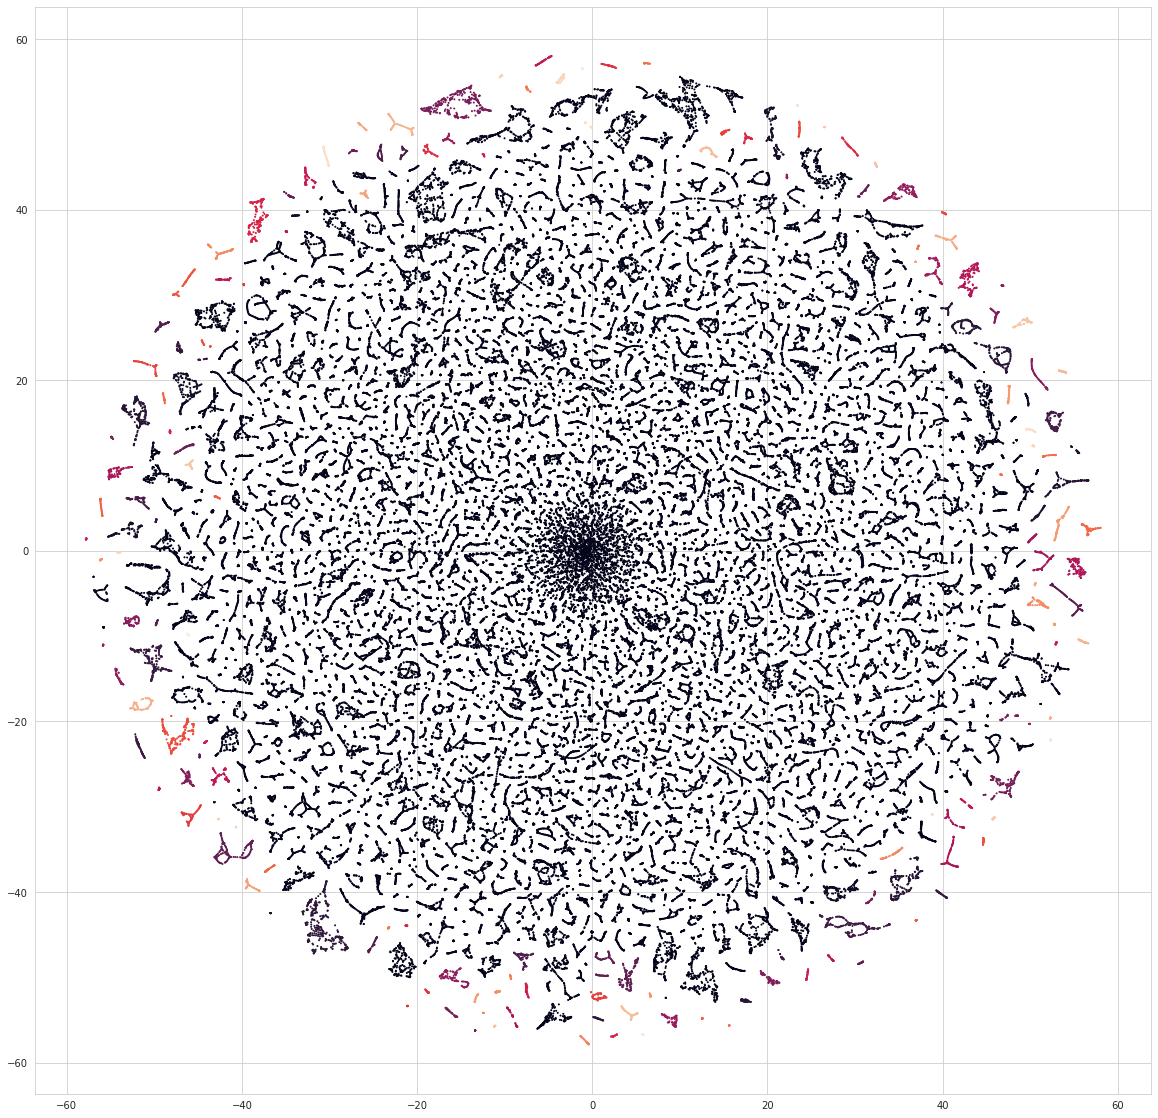

In [11]:
plt.scatter(Trained_tsne[:,0],Trained_tsne[:,1],c=clustering.labels_,s=1)
plt.gcf().set_size_inches((20, 20)) 

In [ ]:
path = "word2vec_model"
osm=[]
with open(path, 'r', encoding='utf8') as f:  ## 這個文檔的格式是一行一個字並配上他的向量，以空白鍵分隔
    for line in f:  
        tokens = line.split()
        token = tokens[0]  ## 第一個token就是詞彙
        vec = tokens[1:]  ## 後面的token向量
        osm.append(token)  ## 把整個model做成一個字典，以利查找字對應的向量
        #count += 1
#vec_dimensions = len(word_vec_mapping.get('men'))  ## 記錄這個mdoel每一個字的維度
del osm [0]
for y in osm :
    for data in G.nodes(data=True):
        if int(y) == data[0] :
            locat.append([data[1]['y'], data[1]['x']])
labelwithid=list(zip(osm,clustering.labels_,locat))

In [ ]:
labelwithid[0][0]

In [ ]:
new = folium.Map(location=[22.2579610,114.2400375], zoom_start=12, tiles="Stamen Terrain")
color = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
for y in labelwithid :
    if y[1] == 1:
        folium.Marker(
        location=[y[2]],
        popup=y,
        icon=folium.Icon(color='red', icon='info-sign'),
        ).add_to(new)
new   